<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [1]:
function binomial_p(n,k,p)
    Prob = (factorial(n)/(factorial(k)*factorial(n-k)))*(p^k)*((1-p)^(n-k))
    return Prob
end

binomial_p (generic function with 1 method)

In [2]:
binomial_p(10, 2, 0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [3]:
binomial_p(10, 5, 0.4)

0.20065812480000003

The chance of losing the bet:

In [4]:
1-binomial_p(10, 5, 0.4)

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

You would end up loosing money, since you win 1 out of 5 times and loose 4 out of 5. With a total loss of 40 and a total win of only 30, resulting in a net of 10 loss every five tosses.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [5]:
binomial_p(10, 4, 0.4)

0.250822656

In [6]:
1-binomial_p(10, 4, 0.4)

0.749177344

You would possibly win money over an infinate number of attemps, but traditionally you should break even in this senario. You would win 1 out of 4 times and loose 3 out of 4. With a total loss of 30 and a win of only 30, resulting in a net of 0.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [7]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\Tim\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Tim\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Tim\.julia\environments\v1.8\Manifest.toml`


In [8]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [9]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [10]:
fit_coeff = Polynomials.coeffs(Polynomials.fit(x,y_observed,1))

2-element Vector{Float64}:
 -0.6202212087828393
  2.7475735362560103

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [11]:
function chisqr(b, m, x, y_observed, sigma)
    return sum(((y_observed .- (m .* x) .-b).^2)/(sigma^2))
    
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [12]:
chi2_list = []
for i = 1:10000
   
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise
    fit_coeff = Polynomials.coeffs(Polynomials.fit(x,y_observed,1))
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
    
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [13]:
Statistics.mean(chi2_list)

9.08215581558035

Yes, the mean of 9 does make sense. The mean should be around the number of data points minus number of coefficients which is 11-2=9.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

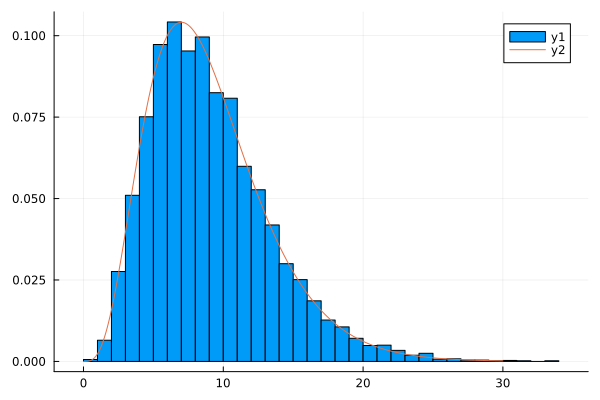

In [14]:

x_dist = 0:0.1:30

Plots.histogram(chi2_list, bins=50, normalize=true)
Plots.plot!(x_dist, di.pdf.(di.Chisq(9),x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [15]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

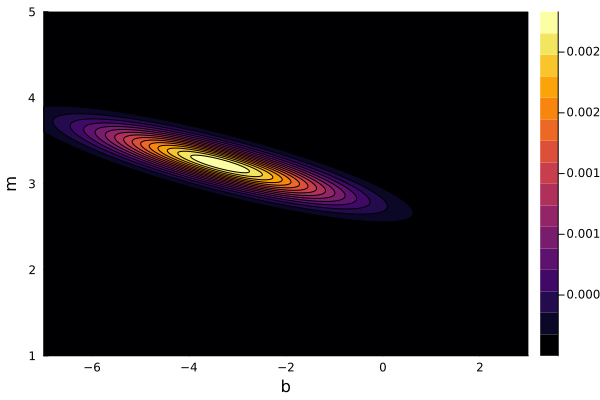

In [16]:
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

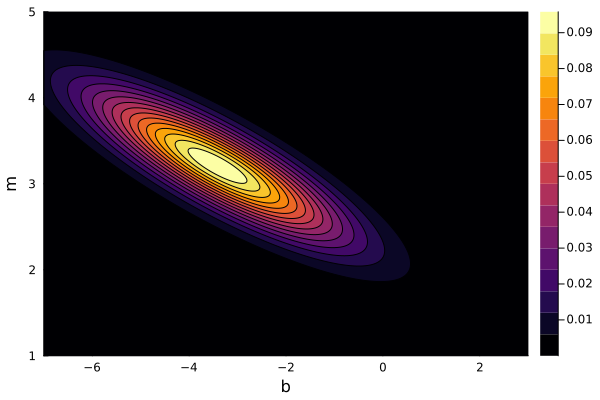

In [17]:
x = 0:.5:5;
y_observed = 3 .* x .- 2 .+ Random.rand(di.Normal(0,3),length(x));
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The distribution is much wider, shifted to the right, and more verticle(higher across more m vales), but has a lower intensity at the center of the distribution.

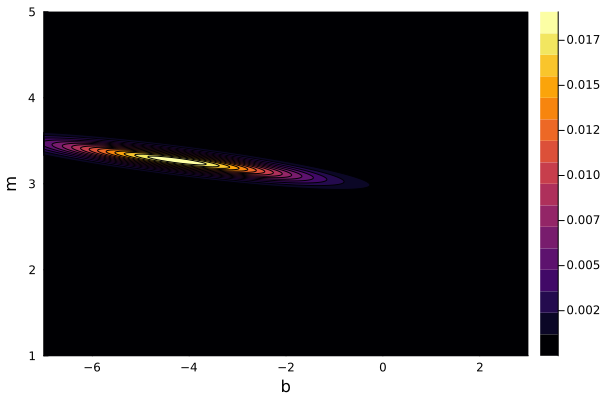

In [18]:
x = 0:2:20;
y_observed = 3 .* x .- 2 .+ Random.rand(di.Normal(0,3),length(x));
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The distribution is much thinner and more horizontal(less m values), but has a higher intensity at the center of the distribution.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

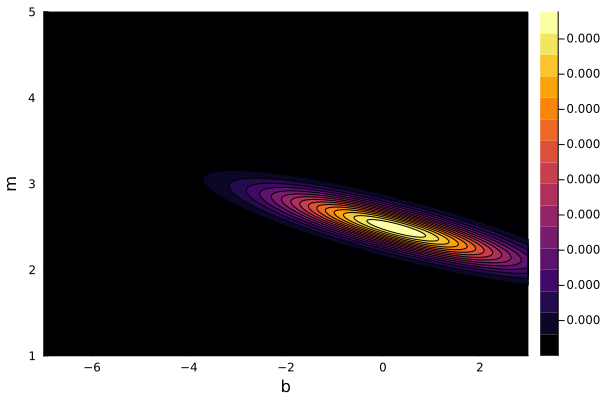

In [19]:
x = 0:1:10;
y_observed = 3 .* x .- 2 .+ Random.rand(di.Normal(0,5),length(x));
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The distribution is shifted to the right, and has a significantly lower intensity at the center of the distribution.

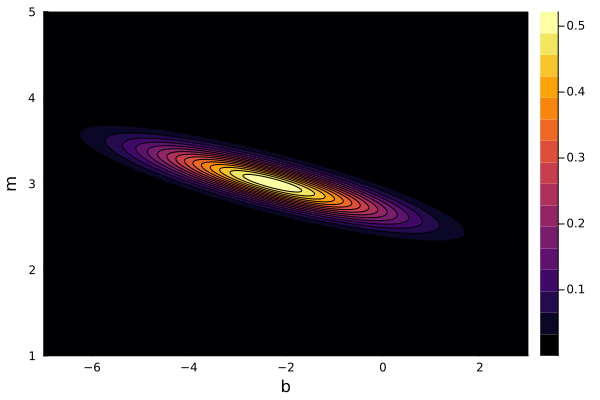

In [20]:
x = 0:1:10;
y_observed = 3 .* x .- 2 .+ Random.rand(di.Normal(0,1),length(x));
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The distribution is shifted to the right, and has a higher intensity at the center of the distribution.